In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('data1.csv')
print(data.head())


# Check for missing values
print('Null values in data:')
print(data.isnull().sum())

# Fix the missing or erroneous 'eventdate' entries
data['eventdate'] = pd.to_datetime(data['eventdate'], errors='coerce')
data.dropna(subset=['eventdate'], inplace=True)


   session_id  user_id  item_id  timeframe eventdate
0           1      NaN    81766     526309  9/5/2016
1           1      NaN    31331    1031018  9/5/2016
2           1      NaN    32118     243569  9/5/2016
3           1      NaN     9654      75848  9/5/2016
4           1      NaN    32627    1112408  9/5/2016
Null values in data:
session_id         0
user_id       728619
item_id            0
timeframe          0
eventdate          0
dtype: int64


In [2]:
import pandas as pd

#Load the data
data = pd.read_csv('data1.csv')

# Remove the 'user_id' column since we are not using it
data.drop(columns=['user_id'], inplace=True)

# convert 'eventdate' to datetime format
data['eventdate'] = pd.to_datetime(data['eventdate'], errors='coerce')

#chdck dataframe structure
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   session_id  1048575 non-null  int64         
 1   item_id     1048575 non-null  int64         
 2   timeframe   1048575 non-null  int64         
 3   eventdate   428014 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3)
memory usage: 32.0 MB
None


In [3]:
print("\nDataset characteristics:")
print("Total number of interactions:", len(data))
print("Total number of sessions:", data['session_id'].nunique())
print("Total number of items:", data['item_id'].nunique())
print("Total number of users:", data['session_id'].nunique())

# Interactions per session
interactions_per_session = data.groupby('session_id').size()
print("\nInteractions per session:")
print(interactions_per_session.describe())



Dataset characteristics:
Total number of interactions: 1048575
Total number of sessions: 247360
Total number of items: 114887
Total number of users: 247360

Interactions per session:
count    247360.000000
mean          4.239065
std           4.091270
min           1.000000
25%           1.000000
50%           3.000000
75%           6.000000
max          81.000000
dtype: float64


In [4]:
# Average session length
average_session_length = interactions_per_session.mean()
print("\nAverage session length:", average_session_length)

# Sessions per item
sessions_per_item = data.groupby('item_id').size()
print("\nSessions per item:")
print(sessions_per_item.describe())




Average session length: 4.239064521345408

Sessions per item:
count    114887.000000
mean          9.127012
std          24.726839
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max        1064.000000
dtype: float64


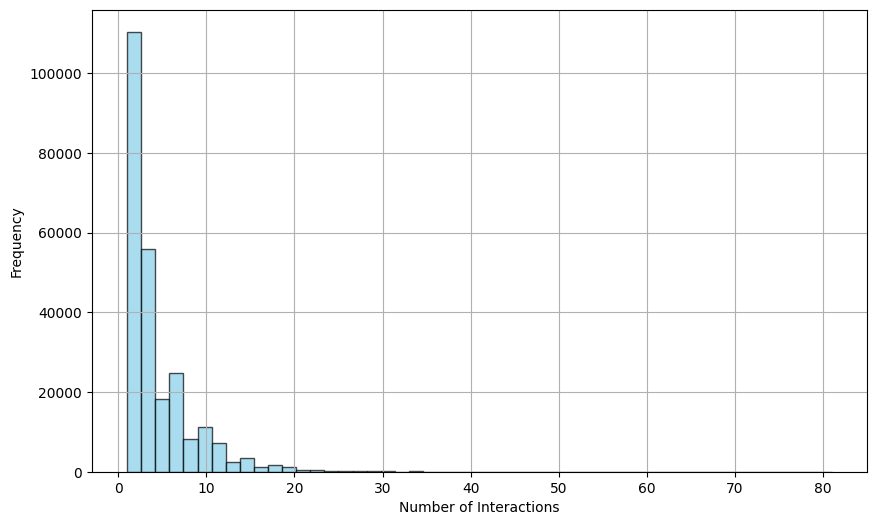

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(interactions_per_session, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Minimum session length: 1
Maximum session length: 81


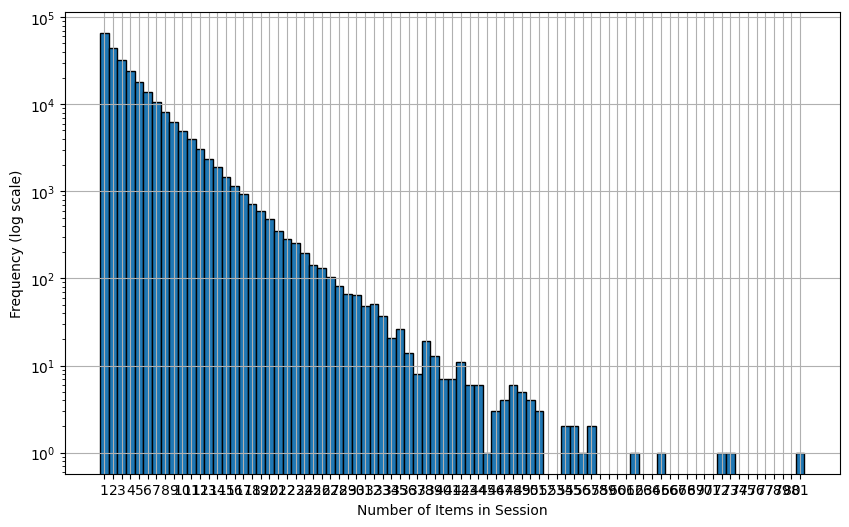

In [6]:

# Calculate session lengths
session_lengths = data.groupby('session_id').size()

# Print min and max session lengths
min_length = session_lengths.min()
max_length = session_lengths.max()
print(f"Minimum session length: {min_length}")
print(f"Maximum session length: {max_length}")

# Plot the session length distribution with log scale on y-axis
plt.figure(figsize=(10, 6))
plt.hist(session_lengths, bins=range(min_length, max_length + 2), edgecolor='black', align='left')
plt.yscale('log')
plt.xlabel('Number of Items in Session')
plt.ylabel('Frequency (log scale)')
plt.xticks(range(min_length, max_length + 1))
plt.grid(True)
plt.show()


In [7]:
# Preprocess the data
def preprocess_data(data):
    data['timestamp'] = pd.to_datetime(data['eventdate'] + ' ' + data['timeframe'].astype(str), errors='coerce')
    data = data.drop(columns=['eventdate', 'timeframe'])
    data = data.dropna(subset=['timestamp'])
    return data

# Load the data
data = pd.read_csv('data1.csv')

# Remove the 'user_id' column
data.drop(columns=['user_id'], inplace=True)

# Preprocess the data
preprocessed_data = preprocess_data(data)

# Print the preprocessed data
print(preprocessed_data)

<ipython-input-7-97eaeed4cf86>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['timestamp'] = pd.to_datetime(data['eventdate'] + ' ' + data['timeframe'].astype(str), errors='coerce')


         session_id  item_id           timestamp
5                 1    33043 2016-09-05 17:39:12
13                2    32971 2016-09-05 18:27:59
22                5    35472 2016-09-05 12:10:36
41               13     3680 2016-05-04 14:48:50
51               15    58223 2016-05-04 10:44:26
...             ...      ...                 ...
1048540      436656    12720 2016-03-27 22:56:34
1048544      436662   389738 2016-05-13 20:46:12
1048547      436663    13323 2016-03-03 21:43:23
1048551      436667   199007 2016-04-26 23:13:27
1048559      436686    89764 2016-04-24 12:18:05

[77250 rows x 3 columns]


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split

#preprocessing for timestamp column
def preprocess_data(data):
    data['timestamp'] = pd.to_datetime(data['eventdate'] + ' ' + data['timeframe'].astype(str), errors='coerce')
    data = data.drop(columns=['eventdate', 'timeframe'])
    data = data.dropna(subset=['timestamp'])
    return data

def construct_graph(data):
    unique_items = data['item_id'].unique().tolist()
    item_to_node = {item: i for i, item in enumerate(unique_items)}

    g = nx.DiGraph()
    for _, session_group in data.groupby('session_id'):
        session_items = session_group['item_id'].unique()
        session_node_ids = [item_to_node[item_id] for item_id in session_items]
        for i in range(len(session_node_ids) - 1):
            src = session_node_ids[i]
            dst = session_node_ids[i + 1]
            time_diff = (session_group.iloc[i + 1]['timestamp'] - session_group.iloc[i]['timestamp']).total_seconds()
            g.add_edge(src, dst, time_diff=time_diff)

    return g, item_to_node

def print_graph_info(g):
    print("Graph Structure:")
    print("Number of nodes:", g.number_of_nodes())
    print("Number of edges:", g.number_of_edges())


    nx.draw(g, with_labels=True)
    plt.show()

class TemporalGNNLayer(nn.Module):
    def __init__(self, in_feats, out_feats, use_attention=True):
        super(TemporalGNNLayer, self).__init__()
        self.use_attention = use_attention
        self.fc = nn.Linear(in_feats, out_feats)
        if use_attention:
            self.attn_fc = nn.Linear(2 * out_feats, 1)

    def edge_attention(self, z_src, z_dst):
        z2 = torch.cat([z_src, z_dst], dim=1)
        a = self.attn_fc(z2)
        return F.leaky_relu(a)

    def forward(self, g, features):
        z = self.fc(features)
        new_features = torch.zeros_like(z)
        for node in g.nodes:
            neighbors = list(g.neighbors(node))
            if not neighbors:
                new_features[node] = z[node]
                continue
            neighbor_feats = z[neighbors]
            node_feat = z[node].unsqueeze(0).repeat(len(neighbors), 1)
            if self.use_attention:
                e = self.edge_attention(node_feat, neighbor_feats).squeeze()
                alpha = F.softmax(e, dim=0)
                if alpha.dim() == 1:
                    alpha = alpha.unsqueeze(1)
                new_features[node] = torch.sum(alpha * neighbor_feats, dim=0)
            else:
                new_features[node] = torch.mean(neighbor_feats, dim=0)
        return new_features

class TemporalGNN(nn.Module):
    def __init__(self, in_feats, hidden_feats, out_feats, num_heads=4):
        super(TemporalGNN, self).__init__()
        self.layer1 = TemporalGNNLayer(in_feats, hidden_feats, use_attention=True)
        self.layer2 = TemporalGNNLayer(hidden_feats, out_feats, use_attention=False)

    def forward(self, g, node_feats):
        h = self.layer1(g, node_feats)
        h = F.elu(h)
        h = self.layer2(g, h)
        return h

def train_model(model, optimizer, g, node_feats, session_data, item_to_node):
    model.train()
    optimizer.zero_grad()
    output = model(g, node_feats)
    loss = 0
    for _, session_group in session_data.groupby('session_id'):
        session_items = session_group['item_id'].unique()
        session_node_ids = [item_to_node[item_id] for item_id in session_items if item_id in item_to_node]
        session_node_feats = output[session_node_ids]
        pos_scores = torch.matmul(session_node_feats, session_node_feats.T).diagonal()
        neg_session_group = session_data[~session_data['session_id'].isin([session_group['session_id'].iloc[0]])]
        neg_session_items = neg_session_group['item_id'].unique()
        neg_session_node_ids = [item_to_node[item_id] for item_id in neg_session_items if item_id in item_to_node]
        neg_session_node_feats = output[neg_session_node_ids]
        neg_scores = torch.matmul(session_node_feats, neg_session_node_feats.T).diagonal()
        loss += F.relu(1 - (pos_scores - neg_scores)).mean()
    loss.backward()
    optimizer.step()
    return loss.item(), output

def recommend_items_for_session(session_id, session_data, top_n=5, output=None, item_to_node=None):
    session_items = session_data[session_data['session_id'] == session_id]['item_id'].unique()
    session_node_ids = [item_to_node[item_id] for item_id in session_items if item_id in item_to_node]
    session_node_feats = output[session_node_ids]
    similarity_scores = torch.matmul(session_node_feats, session_node_feats.T)
    similarity_scores = similarity_scores - torch.eye(similarity_scores.shape[0])
    top_indices = torch.topk(similarity_scores.mean(dim=0), min(top_n, similarity_scores.shape[0])).indices.tolist()
    recommended_items = [session_items[idx] for idx in top_indices]
    return recommended_items

def evaluate_performance(session_ids, true_items, session_data, k=5, output=None, item_to_node=None):
    mrr = 0
    recall = 0
    for session_id, true_item in zip(session_ids, true_items):
        recommended_items = recommend_items_for_session(session_id, session_data, top_n=k, output=output, item_to_node=item_to_node)

        if true_item in recommended_items:
            rank = recommended_items.index(true_item) + 1
            mrr += 1 / rank
            recall += 1
    mrr /= len(session_ids)
    recall /= len(session_ids)
    return mrr, recall



#Read data from Diginetica dataset
data = pd.read_csv('data1.csv')
data = preprocess_data(data)

# Split data into train and test sets
#sample data because dataset is huge
sampled_data = data.sample(n=10000, random_state=42)

#split sampled data into train and test sets
train_data, test_data = train_test_split(sampled_data, test_size=0.2, random_state=42)


#construct graph from training data
g, item_to_node = construct_graph(train_data)

#print_graph_info(g)

# Define model and optimizer
model = TemporalGNN(in_feats=len(item_to_node), hidden_feats=64, out_feats=32)  #chosen hyperparameters after experimenting
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # chosen after experimenting with other values

#training loop
num_epochs = 10
for epoch in range(num_epochs):
    loss, output = train_model(model, optimizer, g, torch.eye(len(item_to_node)), train_data, item_to_node)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}")

#evaluation on test set
session_ids_test = test_data['session_id'].unique()
true_items_test = [test_data[test_data['session_id'] == session_id]['item_id'].iloc[-1] for session_id in session_ids_test]

mrr, recall = evaluate_performance(session_ids_test, true_items_test, test_data, output=output, item_to_node=item_to_node)

print("Final Evaluation on Test Set")
print("Mean Reciprocal Rank (MRR@5):", mrr)
print("Recall@5:", recall)



<ipython-input-9-9307a57a088b>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['timestamp'] = pd.to_datetime(data['eventdate'] + ' ' + data['timeframe'].astype(str), errors='coerce')


Epoch [1/10], Loss: 7763.7456
Epoch [2/10], Loss: 7760.0601
Epoch [3/10], Loss: 7756.1948
Epoch [4/10], Loss: 7752.1021
Epoch [5/10], Loss: 7747.6997
Epoch [6/10], Loss: 7742.9351
Epoch [7/10], Loss: 7737.7075
Epoch [8/10], Loss: 7731.9204
Epoch [9/10], Loss: 7725.4868
Epoch [10/10], Loss: 7718.3008
Final Evaluation on Test Set
Mean Reciprocal Rank (MRR@5): 0.2996480643539467
Recall@5: 0.30015082956259426
